## Simple Moving Average 

1,2,3,7,9
3 SMA = (1+2+3)/3, (2+3+7)/3.. 
https://www.geeksforgeeks.org/how-to-calculate-moving-averages-in-python/

In [1]:
#libraries
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.set_printoptions(precision=2)
pd.set_option("display.precision", 1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# there are many methods of doing manually, it is better to use python built in functions

In [7]:
n1 = [1,2,3,7,9]
n1

[1, 2, 3, 7, 9]

In [10]:
(1+2+3)/3, (2+3+7)/3, round((3+7+9)/3,1)

(2.0, 4.0, 6.3)

In [12]:
np.sum(n1[0:3]), np.sum(n1[1:4]),  np.sum(n1[2:5])

(6, 12, 19)

In [14]:
print(len(n1), '\n' , np.sum(n1[0:3])/3, np.sum(n1[1:4])/3, np.around(np.sum(n1[2:5])/3,1))

5 
 2.0 4.0 6.3


### Panda Series

In [15]:
# convert to panda series
n1s = pd.Series(n1)
print(n1s)

0    1
1    2
2    3
3    7
4    9
dtype: int64


In [28]:
n1sr = n1s.rolling(window=3, min_periods=3, center=True)
n1sr
#https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html

Rolling [window=3,min_periods=3,center=True,axis=0,method=single]

In [27]:
n1s.tolist(), n1sr.sum().tolist(), np.around(n1sr.mean(),1).to_list()

([1, 2, 3, 7, 9], [nan, nan, 6.0, 12.0, 19.0], [nan, nan, 2.0, 4.0, 6.3])

In [32]:
n1s.tolist()

[1, 2, 3, 7, 9]

window : size of moving window
- If an integer, the fixed number of observations used for each window.
- If an offset, the time period of each window

min_periods : Minimum number of observations in window required to have a value; otherwise, result is np.nan
Series.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, step=None, method='single')

In [36]:
n1s.rolling(window=1, min_periods=1, center=True).sum()

0    1.0
1    2.0
2    3.0
3    7.0
4    9.0
dtype: float64

In [37]:
#n1s.rolling(window=1, min_periods=2, center=True).sum()  # error
n1s.rolling(window=2, min_periods=1, center=True).sum() 

0     1.0
1     3.0
2     5.0
3    10.0
4    16.0
dtype: float64

In [31]:
n1s.rolling(window=3, min_periods=1, center=True).sum()

0     3.0
1     6.0
2    12.0
3    19.0
4    16.0
dtype: float64

### There are a number of common moving average indicators each of which has variations utilizing several common lookback periods. The following are the most common among stock-trading:

- Simple Moving Average (SMA): Represents the mean value across a period of n-previous observations. Common lookback periods include 50, 100, and 200-period trailing values.
- Weighted Moving Average (WMA): Represents a weighted mean across a period of n-pervious observations where each observation is given a different weight. Used as the basis for several other moving averages.
- Exponential Moving Average (EMA): Represents a weighted mean across a period of n-previous observations where values closest to the most recent are given exponentially larger consideration.
https://finance.yahoo.com/quote/SBIN.NS

In [39]:
#!pip install yfinance

In [44]:
# import yfinance to get pricing data
import yfinance as yf
# Get 1-yr price history for $NVDA
sbi = yf.Ticker('SBIN.NS') # ICICIBANK.NS, SBIN.NS

In [45]:
#sbi.  #tab
print(dir(sbi), sep='\t')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_analysis', '_base_url', '_data', '_download_options', '_earnings', '_earnings_dates', '_expirations', '_fast_info', '_fetch_ticker_tz', '_financials', '_fix_unit_mixups', '_fix_zeroes', '_fundamentals', '_get_ticker_tz', '_history', '_history_metadata', '_holders', '_isin', '_news', '_options2df', '_quote', '_reconstruct_intervals_batch', '_scrape_url', '_shares', '_tz', 'actions', 'analyst_price_target', 'balance_sheet', 'balancesheet', 'basic_info', 'calendar', 'capital_gains', 'cash_flow', 'cashflow', 'dividends', 'earnings', 'earnings_dates', 'earnings_forecasts', 'earnings_trend', 'fast_info', 'financials', 'get_actions', 'get_analyst_price

In [46]:
sbi.history(period='6d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-10 00:00:00+05:30,553.1,555.0,545.0,547.3,11522371,0.0,0.0
2023-03-13 00:00:00+05:30,547.0,553.2,528.5,530.0,14373729,0.0,0.0
2023-03-14 00:00:00+05:30,527.7,532.8,520.0,525.4,14750800,0.0,0.0
2023-03-15 00:00:00+05:30,529.8,532.0,515.5,517.5,11282329,0.0,0.0
2023-03-16 00:00:00+05:30,518.4,529.3,514.3,524.5,20040008,0.0,0.0
2023-03-17 00:00:00+05:30,528.7,531.6,520.1,529.8,18787379,0.0,0.0


In [68]:
df = sbi.history(period='1y')[['Open', 'High', 'Low', 'Close', 'Volume']]
df.shape

(250, 5)

In [69]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-17 00:00:00+05:30,491.3,495.8,490.6,494.2,22947673
2022-03-21 00:00:00+05:30,494.3,494.3,481.5,483.1,19064060
2022-03-22 00:00:00+05:30,483.1,488.2,469.9,486.1,26157969
2022-03-23 00:00:00+05:30,490.8,494.7,481.7,483.1,15800195
2022-03-24 00:00:00+05:30,477.5,487.2,476.1,479.6,18174877


In [70]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-13 00:00:00+05:30,547.0,553.2,528.5,530.0,14373729
2023-03-14 00:00:00+05:30,527.7,532.8,520.0,525.4,14750800
2023-03-15 00:00:00+05:30,529.8,532.0,515.5,517.5,11282329
2023-03-16 00:00:00+05:30,518.4,529.3,514.3,524.5,20040008
2023-03-17 00:00:00+05:30,528.7,531.6,520.1,529.8,18787379


In [71]:
df['SMA5'] = df['Close'].rolling(window=5).mean()
df[['Close', 'SMA5']].head(10)

,Close,SMA5
Date,,
2022-03-17 00:00:00+05:30,494.2,NaN
2022-03-21 00:00:00+05:30,483.1,NaN
2022-03-22 00:00:00+05:30,486.1,NaN
2022-03-23 00:00:00+05:30,483.1,NaN
2022-03-24 00:00:00+05:30,479.6,485.2
2022-03-25 00:00:00+05:30,483.2,483.0
2022-03-28 00:00:00+05:30,489.9,484.4
2022-03-29 00:00:00+05:30,487.4,484.6
2022-03-30 00:00:00+05:30,486.7,485.3


In [72]:
df.head()

,Open,High,Low,Close,Volume,SMA5
Date,,,,,,
2022-03-17 00:00:00+05:30,491.3,495.8,490.6,494.2,22947673,NaN
2022-03-21 00:00:00+05:30,494.3,494.3,481.5,483.1,19064060,NaN
2022-03-22 00:00:00+05:30,483.1,488.2,469.9,486.1,26157969,NaN
2022-03-23 00:00:00+05:30,490.8,494.7,481.7,483.1,15800195,NaN
2022-03-24 00:00:00+05:30,477.5,487.2,476.1,479.6,18174877,485.2


## Additional libraries in Python
- pandas_ta - ta
- https://www.alpharithms.com/calculating-moving-averages-in-python-585117/
- https://anaconda.org/conda-forge/pandas-ta
- !pip install pandas_ta
- Technical Analysis Indicators - Pandas TA is an easy to use Python 3 Pandas Extension with 130+ Indicators

In [73]:
import pandas_ta as ta
pd.set_option("display.precision", 1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [74]:
# Add indicators, using data from before
df['SMA_5D'] = df.ta.sma(close='close', length=5, append=False)
df.head(10)

,Open,High,Low,Close,Volume,SMA5,SMA_5D
Date,,,,,,,
2022-03-17 00:00:00+05:30,491.3,495.8,490.6,494.2,22947673,NaN,NaN
2022-03-21 00:00:00+05:30,494.3,494.3,481.5,483.1,19064060,NaN,NaN
2022-03-22 00:00:00+05:30,483.1,488.2,469.9,486.1,26157969,NaN,NaN
2022-03-23 00:00:00+05:30,490.8,494.7,481.7,483.1,15800195,NaN,NaN
2022-03-24 00:00:00+05:30,477.5,487.2,476.1,479.6,18174877,485.2,485.2
2022-03-25 00:00:00+05:30,484.2,485.7,479.1,483.2,11541196,483.0,483.0
2022-03-28 00:00:00+05:30,483.4,490.9,474.5,489.9,16738684,484.4,484.4
2022-03-29 00:00:00+05:30,492.3,493.7,484.1,487.4,14301429,484.6,484.6
2022-03-30 00:00:00+05:30,491.6,492.7,484.7,486.7,16461225,485.3,485.3


In [76]:
df['SMA_7D'] = df.ta.sma(close='close', length=7, append=False)
df.head(10)

,Open,High,Low,Close,Volume,SMA5,SMA_5D,SMA_7D
Date,,,,,,,,
2022-03-17 00:00:00+05:30,491.3,495.8,490.6,494.2,22947673,NaN,NaN,NaN
2022-03-21 00:00:00+05:30,494.3,494.3,481.5,483.1,19064060,NaN,NaN,NaN
2022-03-22 00:00:00+05:30,483.1,488.2,469.9,486.1,26157969,NaN,NaN,NaN
2022-03-23 00:00:00+05:30,490.8,494.7,481.7,483.1,15800195,NaN,NaN,NaN
2022-03-24 00:00:00+05:30,477.5,487.2,476.1,479.6,18174877,485.2,485.2,NaN
2022-03-25 00:00:00+05:30,484.2,485.7,479.1,483.2,11541196,483.0,483.0,NaN
2022-03-28 00:00:00+05:30,483.4,490.9,474.5,489.9,16738684,484.4,484.4,485.6
2022-03-29 00:00:00+05:30,492.3,493.7,484.1,487.4,14301429,484.6,484.6,484.6
2022-03-30 00:00:00+05:30,491.6,492.7,484.7,486.7,16461225,485.3,485.3,485.1


In [77]:
df['SMA_10D'] = df.ta.sma(close='close', length=10, append=False)

In [78]:
df.head(11)

,Open,High,Low,Close,Volume,SMA5,SMA_5D,SMA_7D,SMA_10D
Date,,,,,,,,,
2022-03-17 00:00:00+05:30,491.3,495.8,490.6,494.2,22947673,NaN,NaN,NaN,NaN
2022-03-21 00:00:00+05:30,494.3,494.3,481.5,483.1,19064060,NaN,NaN,NaN,NaN
2022-03-22 00:00:00+05:30,483.1,488.2,469.9,486.1,26157969,NaN,NaN,NaN,NaN
2022-03-23 00:00:00+05:30,490.8,494.7,481.7,483.1,15800195,NaN,NaN,NaN,NaN
2022-03-24 00:00:00+05:30,477.5,487.2,476.1,479.6,18174877,485.2,485.2,NaN,NaN
2022-03-25 00:00:00+05:30,484.2,485.7,479.1,483.2,11541196,483.0,483.0,NaN,NaN
2022-03-28 00:00:00+05:30,483.4,490.9,474.5,489.9,16738684,484.4,484.4,485.6,NaN
2022-03-29 00:00:00+05:30,492.3,493.7,484.1,487.4,14301429,484.6,484.6,484.6,NaN
2022-03-30 00:00:00+05:30,491.6,492.7,484.7,486.7,16461225,485.3,485.3,485.1,NaN


## Plotting

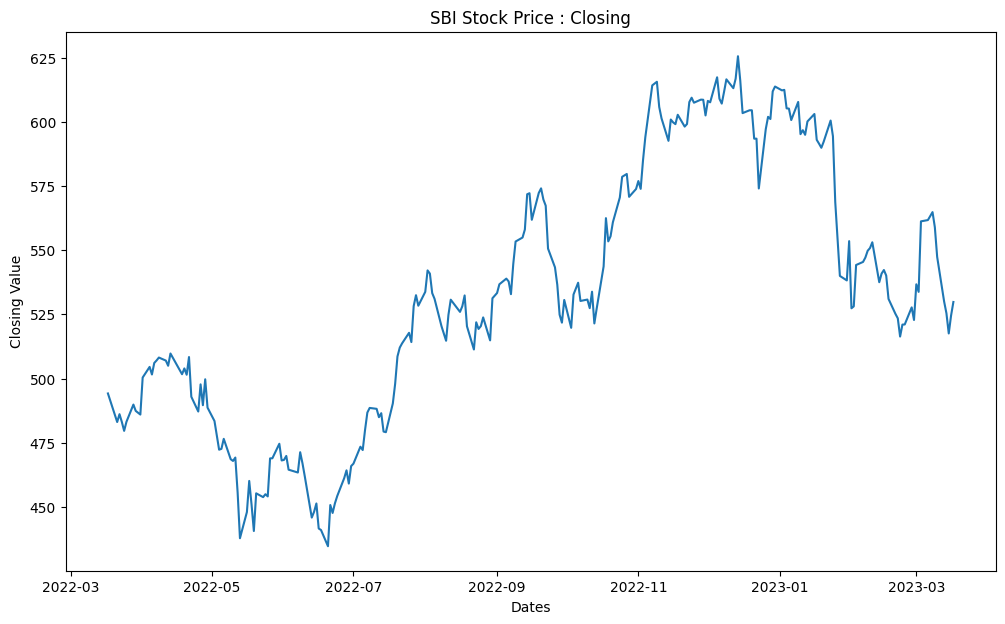

In [81]:
#Closing only
plt.figure(figsize=(12,7))
plt.plot(df.index, df.Close)
plt.xticks()
plt.xlabel('Dates')
plt.ylabel('Closing Value')
plt.title('SBI Stock Price : Closing')
plt.show();

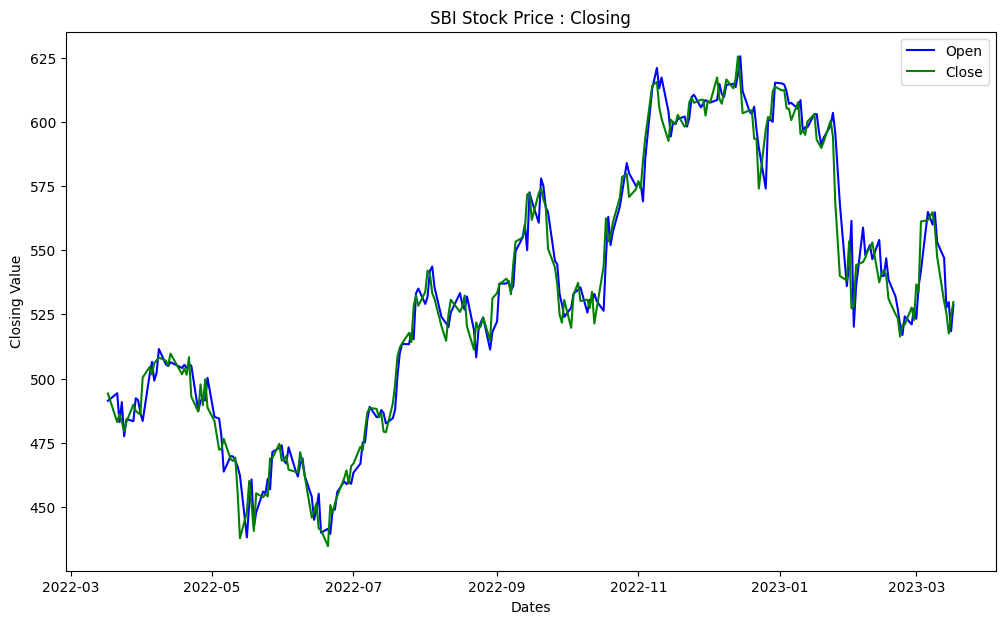

In [82]:
#Open and Closing 
plt.figure(figsize=(12,7))
plt.plot(df.index, df.Open, color='b', label='Open')
plt.plot(df.index, df.Close, color='g', label='Close')
plt.xticks()
plt.xlabel('Dates')
plt.ylabel('Closing Value')
plt.title('SBI Stock Price : Closing')
plt.legend()
plt.show();

In [83]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [84]:
# Returns
df.ta.percent_return(cumulative=True, append=False).round(3)

Date
2022-03-17 00:00:00+05:30    0.0e+00
2022-03-21 00:00:00+05:30   -2.3e-02
2022-03-22 00:00:00+05:30   -1.6e-02
2022-03-23 00:00:00+05:30   -2.2e-02
2022-03-24 00:00:00+05:30   -2.9e-02
2022-03-25 00:00:00+05:30   -2.2e-02
2022-03-28 00:00:00+05:30   -9.0e-03
2022-03-29 00:00:00+05:30   -1.4e-02
2022-03-30 00:00:00+05:30   -1.5e-02
2022-03-31 00:00:00+05:30   -1.7e-02
2022-04-01 00:00:00+05:30    1.3e-02
2022-04-04 00:00:00+05:30    2.1e-02
2022-04-05 00:00:00+05:30    1.5e-02
2022-04-06 00:00:00+05:30    2.4e-02
2022-04-07 00:00:00+05:30    2.6e-02
2022-04-08 00:00:00+05:30    2.8e-02
2022-04-11 00:00:00+05:30    2.6e-02
2022-04-12 00:00:00+05:30    2.2e-02
2022-04-13 00:00:00+05:30    3.1e-02
2022-04-18 00:00:00+05:30    1.5e-02
2022-04-19 00:00:00+05:30    2.0e-02
2022-04-20 00:00:00+05:30    1.5e-02
2022-04-21 00:00:00+05:30    2.9e-02
2022-04-22 00:00:00+05:30   -3.0e-03
2022-04-25 00:00:00+05:30   -1.4e-02
2022-04-26 00:00:00+05:30    7.0e-03
2022-04-27 00:00:00+05:30   -9.0e